In [ ]:
# Spring 2022
# loading images

In [ ]:
import numpy as np
# import matplotlib.pyplot as plt 
# %matplotlib inline

: 

In [3]:
# load the raw data
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
print('shape of the training data:', X_train.shape)
print('shape of the target data:', y_train.shape)

shape of the training data: (3320, 150, 150)
shape of the target data: (3320,)


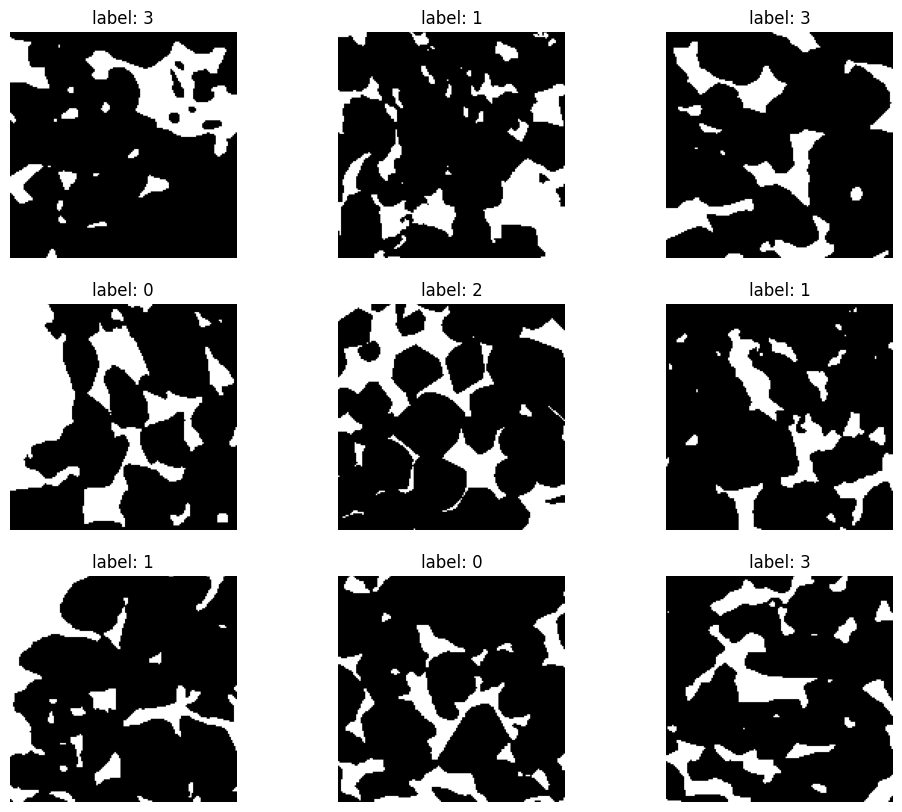

In [4]:
# # preview some of the training images
# plt.figure(figsize=(12,10))
# x, y =3, 3
# for i in range(9):  
#     plt.subplot(y, x, i+1)
#     plt.imshow(X_train[i,:,:],cmap='gray')
#     plt.title('label: {}'.format(y_train[i]))
#     plt.axis('off')
# plt.show()

In [ ]:
# analyze data

In [5]:
# add an extra dimension to the data
X_train = X_train.reshape(X_train.shape[0], 150, 150, 1)
print('shape of the training data:', X_train.shape)

shape of the training data: (3320, 150, 150, 1)


In [6]:
# train you model

# create a CNN model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(150,150,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))

# compile the model
model.compile(optimizer=Adam(lr=0.01, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])

# train the model
batch_size = 64
epochs = 100

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.2)


Epoch 1/10
21/21 [==============================] - 16s 744ms/step - loss: -6.5993 - accuracy: 0.2572 - val_loss: -8.0380 - val_accuracy: 0.2184
Epoch 2/10
21/21 [==============================] - 16s 745ms/step - loss: -7.6648 - accuracy: 0.2519 - val_loss: -8.0380 - val_accuracy: 0.2184
Epoch 3/10
21/21 [==============================] - 16s 741ms/step - loss: -7.6648 - accuracy: 0.2519 - val_loss: -8.0380 - val_accuracy: 0.2184
Epoch 4/10
21/21 [==============================] - 16s 741ms/step - loss: -7.6648 - accuracy: 0.2519 - val_loss: -8.0380 - val_accuracy: 0.2184
Epoch 5/10
21/21 [==============================] - 16s 745ms/step - loss: -7.6648 - accuracy: 0.2519 - val_loss: -8.0380 - val_accuracy: 0.2184
Epoch 6/10
21/21 [==============================] - 16s 745ms/step - loss: -7.6648 - accuracy: 0.2519 - val_loss: -8.0380 - val_accuracy: 0.2184
Epoch 7/10
21/21 [==============================] - 16s 748ms/step - loss: -7.6648 - accuracy: 0.2519 - val_loss: -8.0380 - val_ac

In [ ]:
# load the test data
X_test = np.load('X_test.npy')
print('shape of the test data:', X_test.shape)

In [ ]:
# make prediction for the test data